In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [73]:
bikes_day = pd.read_csv(r"C:\Users\Pushkara.Aravapalli\Documents\Data Science\Bike Sharing\day.csv")


In [74]:
bikes_day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


The ridership seem to be constantly increasing however there is a slight drop durng weekends.

dropping columns

In [75]:
bikes_day = bikes_day.drop(['casual' , 'registered'], axis=1)

In [76]:
bikes_day.info()
#There are no null values as seen below


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


In [77]:
bikes_day['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

Summary of 'cnt' feature

Text(0.5, 0.98, 'Recorded Bike Rental Counts')

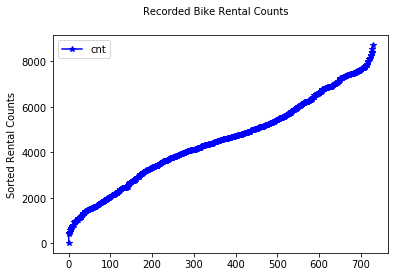

In [78]:
fig, ax = plt.subplots(1)
ax.plot(sorted(bikes_day['cnt']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)

Understandnig relationships

Text(0, 0.5, 'Count of all Biks Rented')

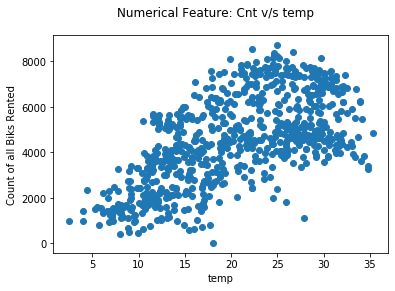

In [79]:
plt.scatter(bikes_day['temp'], bikes_day['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

There is a relation between 'count of all bikes rented; and temperature

Text(0, 0.5, 'Count of all Biks Rented')

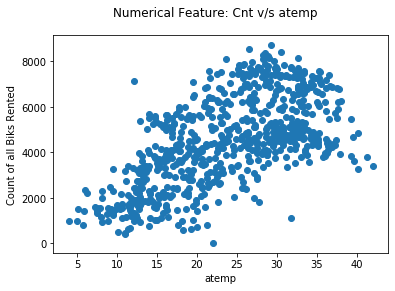

In [80]:
plt.scatter(bikes_day['atemp'], bikes_day['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

Dropping a atemp feature

Text(0, 0.5, 'Count of all Biks Rented')

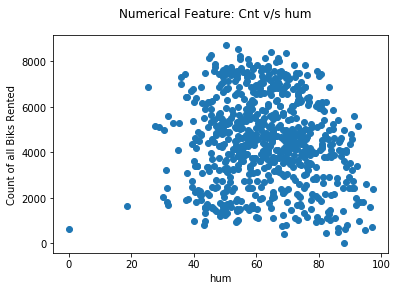

In [81]:
plt.scatter(bikes_day['hum'], bikes_day['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

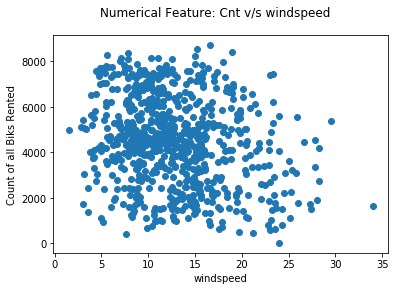

In [82]:
plt.scatter(bikes_day['windspeed'], bikes_day['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

The plot gets widespread as we move along the x axis
The Count of all bikes rented and windspeed are not correlated

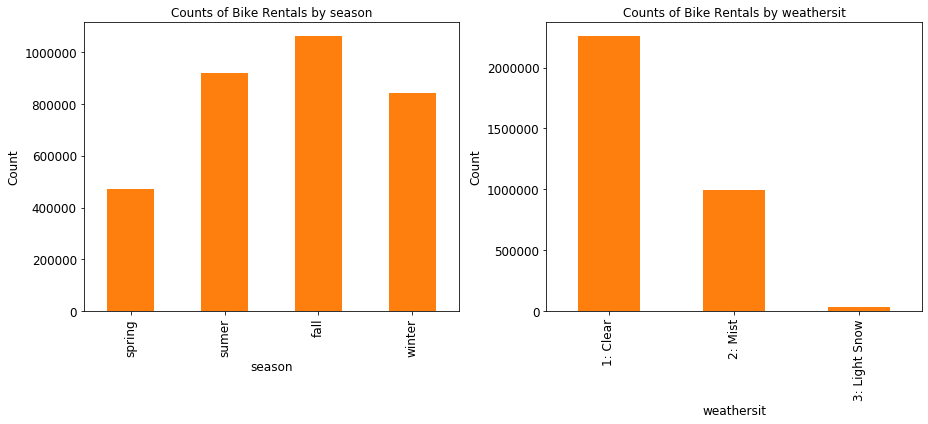

In [83]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = bikes_day[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar', legend = False, title ="Counts of Bike Rentals by season", stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])
ax2 = bikes_day[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

Clear weather makes people rent bikes

Modelling with Linear Regression

In [84]:
bikes_df_model_data = bikes_day.copy()

outcome = 'cnt'

#adding features
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

#spliting train and test portion
X_trian, X_test, y_pred, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn import linear_model
lr_model = linear_model.LinearRegression()

#training the model in training data set
lr_model.fit(X_trian, y_train)

# predecting the model using test set
y_pred = lr_model.predict(X_test)

#RSME
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 873.25


The root mean sqaure error seems to be high as of 873.25, we can improve this furthur and trying different modelling

In [85]:
bikes_df_model_data = bikes_day.copy()

outcome = 'cnt'

feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

X_trian, X_test, y_pred, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(2)
X_train = poly_feat.fit_transform(X_trian)
X_test = poly_feat.fit_transform(X_test)

from sklearn import linear_model
lr_model= linear_model.LinearRegression()

lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)


print("Root Mean squared error with PolynomialFeatures set to 2 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred)))
bikes_df_model_data = bikes_day.copy()

outcome = 'cnt'


feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

X_trian, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(4)
X_train = poly_feat.fit_transform(X_trian)
X_test = poly_feat.fit_transform(X_test)

from sklearn import linear_model
lr_model= linear_model.LinearRegression()


lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)


print("Root Mean squared error with PolynomialFeatures set to 4 degrees: %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error with PolynomialFeatures set to 2 degrees: 856.06
Root Mean squared error with PolynomialFeatures set to 4 degrees: 17946.46


Other types of modelling - Non Linear modelling

In [88]:

features = ['holiday', 'temp']
from sklearn import linear_model
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
    
for feat in features:
    model_lr = linear_model.LinearRegression()
    model_lr.fit(X_train[[feat]], y_train)
    predictions = model_lr.predict(X_test[[feat]])
    print('R^2 for %s is %f' % (feat, r2_score(y_test, predictions)))
 

R^2 for holiday is -0.010647
R^2 for temp is 0.369972


In [89]:

model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)
 

print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))
print('\n')
print('Intercept: %f' % model_lr.intercept_)


feature_coefficients  = pd.DataFrame({'coefficients':model_lr.coef_[0], 
                                    'features':X_train.columns.values})

feature_coefficients.sort_values('coefficients')

Root Mean squared error: 1523.97


Intercept: 1207.061505


,coefficients,features
0,-523.121118,holiday
1,163.511969,temp


Setting coff

In [90]:
INTERCEPT = -121.029547

#temp
Coff_Temp = 163.511969 

#Winter
CoffSeason_4 = 39.009224   

# if the day is holiday
Coff_Holiday = -523.121118   

#Springer
CoffSeason_1 = 3.861149    

#Summer
CoffSeason_2 = -1.624812   

#Fall
CoffSeason_3 = -41.245562    

In [91]:
np.mean(X_train['temp'])

20.550309976712306

In [92]:
# mean values
MEAN_HOLIDAY = 0.0275   # day is holiday or not
MEAN_HOUR = 11.6        # hour (0 to 23)
MEAN_SEASON_1 = 1       # 1:spring
MEAN_SEASON_2 = 0       # 2:summer
MEAN_SEASON_3 = 0       # 3:fall
MEAN_SEASON_4 = 0       # 4:winter
MEAN_TEMP = 0.4967      # norm temp in Celsius -8 to +39


# try predicting something - 9AM with all other features held constant
rental_counts = INTERCEPT + (MEAN_HOLIDAY * Coff_Holiday) \
    + (MEAN_SEASON_1 * CoffSeason_1)  + (MEAN_SEASON_2 * CoffSeason_2) \
    + (MEAN_SEASON_3 * CoffSeason_3)  + (MEAN_SEASON_4 * CoffSeason_4) \
    + (MEAN_TEMP * Coff_Temp)

print('Estimated bike rental count for selected parameters: %i' % int(rental_counts))   

Estimated bike rental count for selected parameters: -50
